In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn

In [2]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))
font_list[:5]

0


['C:\\Windows\\Fonts\\MP.TTF',
 'C:\\Windows\\Fonts\\BELLI.TTF',
 'C:\\WINDOWS\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\WINDOWS\\Fonts\\ENORBITB.TTF']

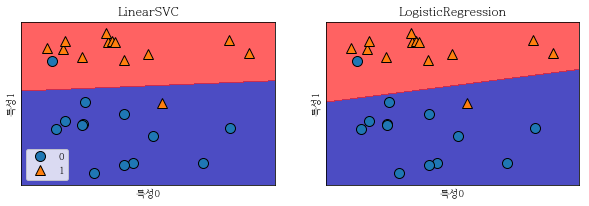

In [3]:
path = 'C:\\Windows\\Fonts\\HANBatang.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
#print(font_name)
plt.rc('font', family=font_name)

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

axes[0].legend()

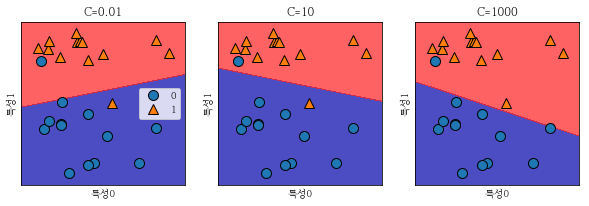

In [4]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for c, ax in zip([0.01, 10, 1000],axes):
    clf = LinearSVC(C=c).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("C="+str(c))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.958041958041958


C=100
train regulation : 0.9882629107981221
test regulation : 0.972027972027972
C=1
train regulation : 0.960093896713615
test regulation : 0.958041958041958
C=0.001
train regulation : 0.9154929577464789
test regulation : 0.9230769230769231


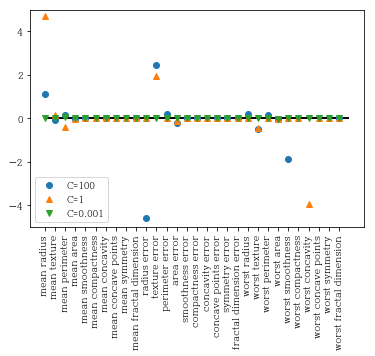

In [6]:
for c, s in zip([100,1,0.001],['o','^','v']):
    logreg = LogisticRegression(C=c, penalty='l1').fit(X_train,y_train)
    plt.plot(logreg.coef_.T,marker=s,linewidth=0, label='C='+str(c))
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
    plt.hlines(0,0,cancer.data.shape[1])
    plt.ylim(-5,5)
    print("C={}\ntrain regulation : {}".format(c,logreg.score(X_train, y_train)))
    print("test regulation : {}".format(logreg.score(X_test, y_test)))
plt.legend(loc='lower left')

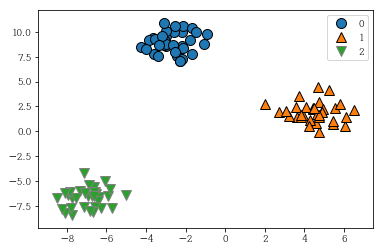

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.legend(loc='upper right')

In [8]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492413  0.23141038]
 [ 0.47621177 -0.06936746]
 [-0.18913895 -0.2040056 ]]
[-1.0774507   0.13140563 -0.08604938]


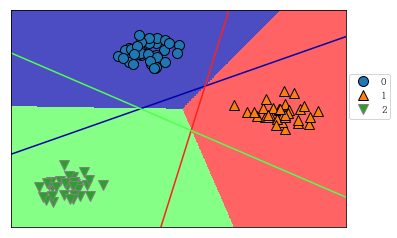

In [9]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

line = np.linspace(-15,15)

for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)

#plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(loc=(1.01,0.5))